In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
import pandas as pd

# File path for the unstructured text file
file_path = "/content/drive/MyDrive/Data Source//Customer_Reviews.txt"

# Read the unstructured text file
with open(file_path, "r") as file:
    reviews = file.readlines()

# Define a function to determine sentiment
def get_sentiment(rating):
    rating_value = int(rating.split('/')[0])
    if rating_value >= 4:
        return "Positive"
    elif rating_value == 3:
        return "Neutral/Moderate"
    else:
        return "Negative"

# Function to guess the product type based on context
def guess_product_type(review):
    products = [
        "coffee maker", "smartphone", "book", "headphones", "vacuum cleaner",
        "gaming console", "smartwatch", "blender", "office chair", "microwave oven",
        "running shoes", "television", "backpack", "laptop", "tablet", "winter jacket",
        "earbuds", "washing machine", "cookbook", "action camera", "desk lamp",
        "fridge", "air fryer", "sofa"
    ]
    for product in products:
        if product in review.lower():
            return product.title()
    return "Product"

# Parse the reviews and extract relevant details
data = []
for idx, review in enumerate(reviews, start=1):
    # Guess product type
    product_type = guess_product_type(review)

    # Extract purchase date and rating using regex
    date_match = re.search(r"\d{4}-\d{2}-\d{2}", review)
    purchase_date = date_match.group(0) if date_match else "Unknown"

    rating_match = re.search(r"\d/\d", review)
    rating = rating_match.group(0) if rating_match else "Unknown"

    # Determine sentiment based on the rating
    sentiment = get_sentiment(rating) if rating != "Unknown" else "Unknown"

    # Append extracted data
    data.append({
        "Review ID": idx,
        "Product Type": product_type,
        "Purchase Date": purchase_date,
        "Rating": rating,
        "Sentiment": sentiment
    })

# Create a DataFrame
df = pd.DataFrame(data)

df

,Review ID,Product Type,Purchase Date,Rating,Sentiment
0,1,Sofa,2023-01-15,2/5,Negative
1,2,Coffee Maker,2025-01-02,5/5,Positive
2,3,Smartphone,2024-12-22,3/5,Neutral/Moderate
3,4,Book,2024-11-15,5/5,Positive
4,5,Headphones,2024-10-10,2/5,Negative
...,...,...,...,...,...
115,116,Smartwatch,2024-02-23,2/5,Negative
116,117,Coffee Maker,2023-08-30,5/5,Positive
117,118,Coffee Maker,2023-02-21,2/5,Negative
118,119,Smartphone,2024-09-07,5/5,Positive


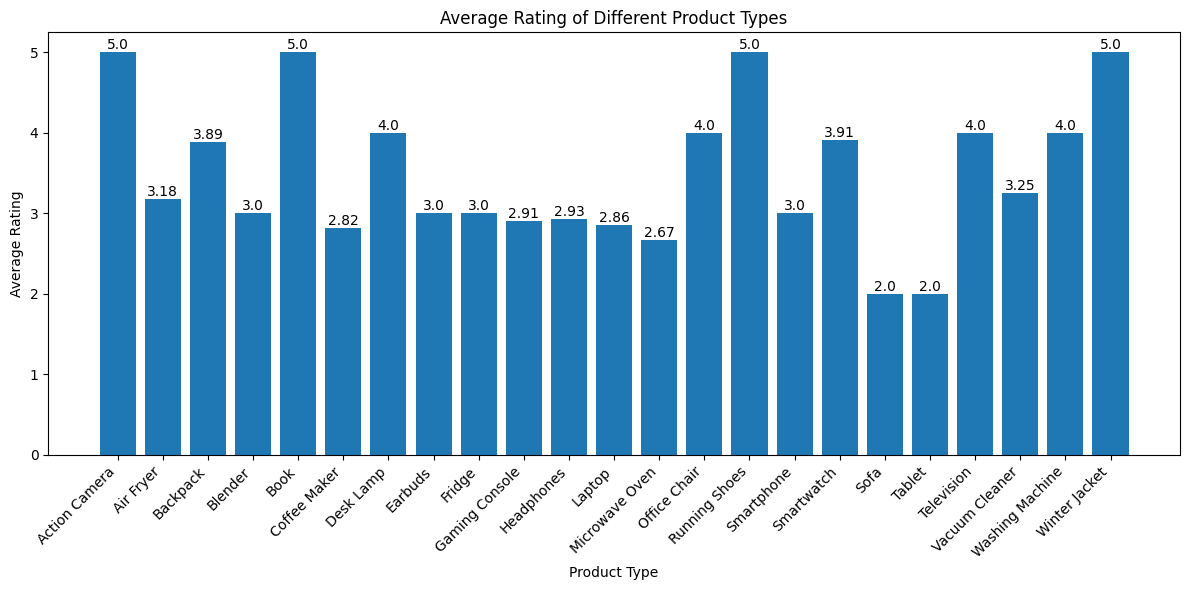

In [6]:
# prompt: Finding average rating of different Product Type and showing it via bar chart also mention data labels

import matplotlib.pyplot as plt

# Calculate the average rating for each product type
average_ratings = df.groupby("Product Type")["Rating"].agg(lambda x: x.str.split('/').str[0].astype(float).mean())

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(average_ratings.index, average_ratings.values)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("Product Type")
plt.ylabel("Average Rating")
plt.title("Average Rating of Different Product Types")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [7]:
# prompt: summarize Sentiments for Product Type

import pandas as pd

# Assuming 'df' is the DataFrame created in the previous code

# Group by product type and sentiment, then count the occurrences
sentiment_summary = df.groupby(["Product Type", "Sentiment"]).size().unstack(fill_value=0)

# Calculate the total number of reviews for each product type
sentiment_summary["Total"] = sentiment_summary.sum(axis=1)

# Calculate the percentage of each sentiment for each product type
for sentiment in ["Negative", "Neutral/Moderate", "Positive"]:
    sentiment_summary[f"{sentiment}%"] = (sentiment_summary[sentiment] / sentiment_summary["Total"]) * 100

sentiment_summary

Sentiment,Negative,Neutral/Moderate,Positive,Total,Negative%,Neutral/Moderate%,Positive%
Product Type,,,,,,,
Action Camera,0,0,1,1,0.000000,0.000000,100.000000
Air Fryer,4,3,4,11,36.363636,27.272727,36.363636
Backpack,1,1,7,9,11.111111,11.111111,77.777778
Blender,0,1,0,1,0.000000,100.000000,0.000000
Book,0,0,2,2,0.000000,0.000000,100.000000
Coffee Maker,6,0,5,11,54.545455,0.000000,45.454545
Desk Lamp,0,0,1,1,0.000000,0.000000,100.000000
Earbuds,0,1,0,1,0.000000,100.000000,0.000000
Fridge,0,1,0,1,0.000000,100.000000,0.000000


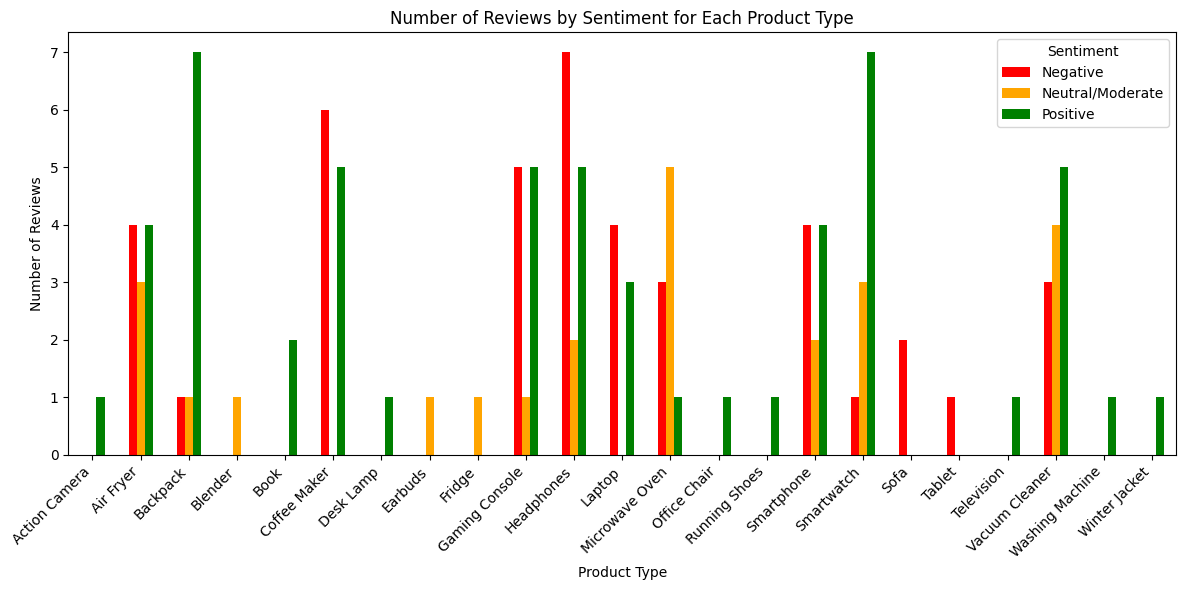

In [12]:
# prompt: show the result of number of reviews not percentage  using side by side bar chart using columns Sentiment	Negative	Neutral/Moderate	Positive, colour of Negative is red, colour of Neutral/Moderate is brown, colour of Positive is green

import matplotlib.pyplot as plt

# Assuming 'sentiment_summary' DataFrame from the previous code

# Create the side-by-side bar chart
sentiment_summary[["Negative", "Neutral/Moderate", "Positive"]].plot(kind="bar", figsize=(12, 6), color=["red", "orange", "green"])

plt.xlabel("Product Type")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Sentiment for Each Product Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()